## 範例 : (Kaggle)房價預測

以下用房價預測資料, 觀察去除離群值的影響

## [教學目標]

以下用房價預測資料, 觀察去除離群值的影響

## [範例重點]

觀察原始數值的散佈圖, 以及線性迴歸分數 (In[5], Out[5])

觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[6], Out[6])

觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[7], Out[7])

In [16]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part02/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [18]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


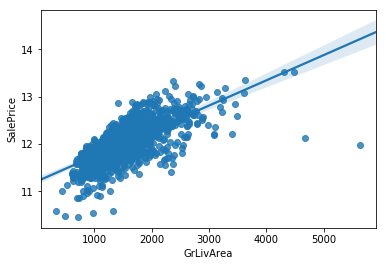

0.8444371990086037

In [19]:
# 顯示 GrLivArea 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['GrLivArea'], y=train_Y) # train_Y = np.log1p(df_train['SalePrice'])
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

## .clip() 限制min, Max範圍 - 「調整」離群值

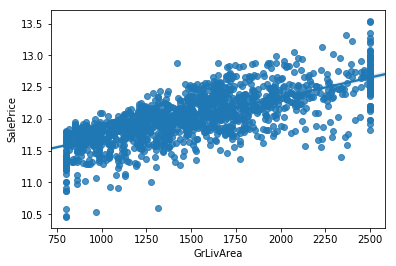

0.8590286613713278

In [20]:
# 將 GrLivArea 限制在 800 到 2500 以內, 調整離群值
df['GrLivArea'] = df['GrLivArea'].clip(800, 2500)
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

## keep_indexs - 「捨棄」離群值

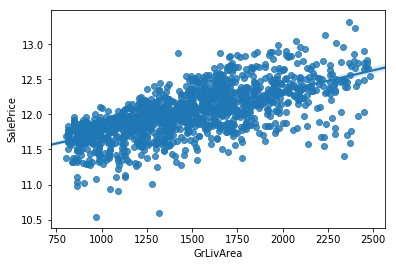

0.8771692014986918

In [21]:
# 將 GrLivArea 限制在 800 到 2500 以內, 捨棄離群值
keep_indexs = (df['GrLivArea']> 800) & (df['GrLivArea']< 2500)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()


## 作業 : (Kaggle)房價預測

## [作業目標]

試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

## [作業重點]

觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])

觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [36]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = '/Users/johnsonhuang/py_ds/ML_100/2nd-ML100Days/homework/data/Part02/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [37]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [38]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


## 作業1

試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

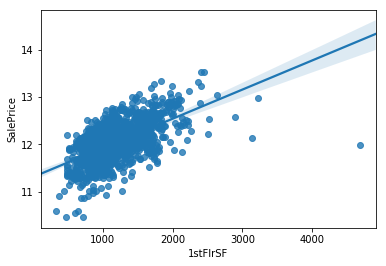

0.8444371990086037

In [25]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

334

4692

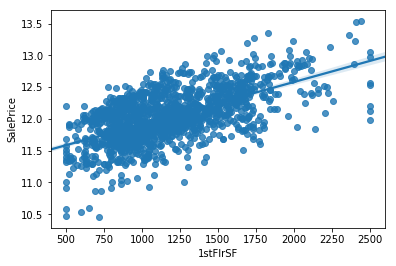

In [26]:
display(min(df["1stFlrSF"]))
display(max(df["1stFlrSF"]))

sns.regplot(x = df['1stFlrSF'][:train_num].clip(500, 2500), y=train_Y)
plt.show()

In [27]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 「調整」離群值
"""
Your Code Here
"""

# 「調整」離群值
df['1stFlrSF'] = df['1stFlrSF'].clip(500, 2500)

# 「捨棄」離群值
# keep_indexs = (df['1stFlrSF'] > 500) & (df['1stFlrSF'] < 2500)
# df = df[keep_indexs]
# train_Y = train_Y[keep_indexs]


# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8868529812963668

In [31]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
score = []
for i in range(50):
    df['1stFlrSF_temp'] = df['1stFlrSF'].clip(df['1stFlrSF'].quantile(i/1000), df['1stFlrSF'].quantile(1-i/1000))
    # 做線性迴歸, 觀察分數
    train_X = MMEncoder.fit_transform(df.drop('1stFlrSF',axis=1))
    estimator = LinearRegression()
    score.append([i/100, cross_val_score(estimator, train_X, train_Y, cv=5).mean()])
    df.drop('1stFlrSF_temp',axis=1)
score = pd.DataFrame(score).sort_values(1)
score

,0,1
1,0.01,0.697363
0,0.00,0.846187
49,0.49,0.862031
48,0.48,0.862085
47,0.47,0.862152
46,0.46,0.862251
45,0.45,0.862258
44,0.44,0.862351
43,0.43,0.862479
42,0.42,0.863264


## 作業2

續前題, 去除離群值有兩類方式 : 捨棄離群值(刪除離群的資料) 以及調整離群值,

請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

> 在適當的篩選並刪除離群職之後結果有變好，可能如同投影片提到的，只要離群值數量夠少，除去離群值，將可使得模型預測較為準確

In [35]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""

#「捨棄」離群值
keep_indexs = (df['1stFlrSF'] > 500) & (df['1stFlrSF'] < 2500)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]


# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.891410569228613

In [39]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
score = []
for i in range(50):
    index = (df['1stFlrSF'] > df['1stFlrSF'].quantile(i/1000)) & (df['1stFlrSF'] < df['1stFlrSF'].quantile(1-i/1000))
    # 做線性迴歸, 觀察分數
    train_X = MMEncoder.fit_transform(df.loc[index])
    estimator = LinearRegression()
    score.append([i/100,cross_val_score(estimator, train_X, train_Y.loc[index], cv=5).mean()])
score = pd.DataFrame(score).sort_values(1)
score

,0,1
22,0.22,0.873547
24,0.24,0.877290
49,0.49,0.878635
48,0.48,0.878979
42,0.42,0.879236
47,0.47,0.879353
37,0.37,0.879429
31,0.31,0.879520
46,0.46,0.879629
45,0.45,0.879629


## [離群值! 離群值? 離群值!](https://zhuanlan.zhihu.com/p/33468998)

Python 知乎-連玉君stata  


本文除了談到離群值的定義外，主要在第3部分: 離群值處理方法，不僅僅告訴你有哪幾類方式，並以圖示的方式呈現讓同學能以常識推論分析，其中對數轉換的部分，我們會在明天的內容有更多的講解，同學大致了解方向即可。

![image](https://lh3.googleusercontent.com/5HSYk6abwctVPJ_1D4QoH3o2fH8jgUKAcCjsHrRWTHWP_wqsqfKHg6HOp2W01kADquQ0HUCDVPZA-CEg7PtTL8ru3iy_MvmxtLXoHZIWfBhI_02SDF5_cXyGHQGPi2iugRD81YvNs5M?t=1557118524560)